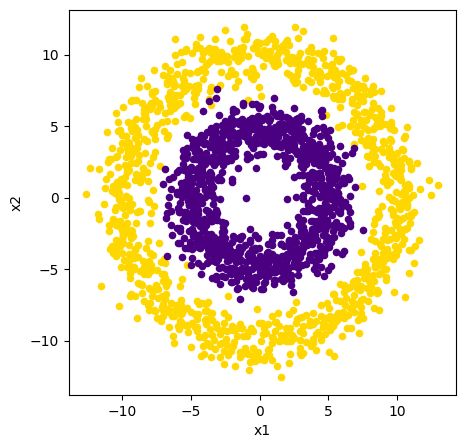

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot


def create_donut(radius, size=1000):
    # assume that arr is in polar coordinates
    arr = np.array([np.linspace(0, 2 * np.pi, size), np.random.randn(size)]).T + radius
    cartesian_arr = np.array([arr[:, 1] * np.cos(arr[:, 0]), arr[:, 1] * np.sin(arr[:, 0])]).T
    return cartesian_arr


outerCircle = create_donut(10)
innerCircle = create_donut(5)

dfo = pd.DataFrame(outerCircle, columns=["x1", "x2"])
dfo["y"] = 1
dfi = pd.DataFrame(innerCircle, columns=["x1", "x2"])
dfi["y"] = 0

# generate DataFrame for result csv
df_result = pd.concat([dfi, dfo], ignore_index=True)

df_result["x1^2"] = df_result["x1"] ** 2
df_result["x2^2"] = df_result["x2"] ** 2
df_result["x1*x2"] = df_result["x1"] * df_result["x2"]

# rearrange columns
df_result = df_result[["x1", "x2", "x1^2", "x2^2", "x1*x2", "y"]]
# shuffle to mix up "y" values
df_result = df_result.sample(frac=1.0)

df_result.to_csv("result.csv", header=False, index=False)

# plot
ax = dfo.plot(x=0, y=1, kind="scatter", color="gold")
dfi.plot(x=0, y=1, kind="scatter", color="indigo", ax=ax, figsize=(5, 5), legend=False)

plot.show()